**Trader Performance vs Market Sentiment**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data
sentiment = pd.read_csv("/content/fear_greed_index.csv")
trades = pd.read_csv("/content/historical_data.csv")

In [ ]:
#printing info and shape
print(sentiment.shape)
print(trades.shape)

print(sentiment.info())
print(trades.info())

(2644, 4)
(211224, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Sta

In [ ]:
#checking for null values
print(sentiment.isnull().sum())
print(trades.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [ ]:
#dropping duplicates if any
sentiment.drop_duplicates(inplace=True)
trades.drop_duplicates(inplace=True)

In [44]:
#normalizing converting the column name in lowercase
trades.columns = trades.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment.columns = sentiment.columns.str.strip().str.lower().str.replace(" ", "_")
print(trades.columns)
print(sentiment.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [ ]:
#converting timestamp
trades['timestamp_ist'] = pd.to_datetime(trades['timestamp_ist'], dayfirst=True, errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

print(trades['timestamp_ist'].head())
print(sentiment['date'].head())

0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: timestamp_ist, dtype: datetime64[ns]
0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: date, dtype: datetime64[ns]


In [46]:
#creating comman date column
trades['date'] = trades['timestamp_ist'].dt.normalize()
sentiment['date'] = sentiment['date'].dt.normalize()

print(trades['date'].head())
print(sentiment['date'].head())

0   2024-12-02
1   2024-12-02
2   2024-12-02
3   2024-12-02
4   2024-12-02
Name: date, dtype: datetime64[ns]
0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: date, dtype: datetime64[ns]


In [47]:
print("Trades:", trades['date'].min(), trades['date'].max())
print("Sentiment:", sentiment['date'].min(), sentiment['date'].max())

Trades: 2023-05-01 00:00:00 2025-05-01 00:00:00
Sentiment: 2018-02-01 00:00:00 2025-05-02 00:00:00


step 3

In [118]:
# mergeing
data = pd.merge(trades, sentiment, on='date', how='inner')
print(data.shape)

(211218, 20)


In [119]:
print(data.shape)
print(data.head())
print(data['classification'].value_counts())

(211218, 20)
                                      account  coin  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   size_tokens  size_usd side       timestamp_ist  start_position direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   closed_pnl                                   transaction_hash     order_id  

In [120]:
print(data.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp_x', 'date', 'timestamp_y', 'value', 'classification'],
      dtype='object')


In [121]:
#changing name to simple one
data.rename(columns={'closed_pnl': 'pnl'}, inplace=True)

In [122]:
#win and loss column
data['win'] = data['pnl'] > 0

In [123]:
#daily profit and loss per trader
daily_pnl = data.groupby(['account','date'])['pnl'].sum().reset_index()
print(daily_pnl.head())

                                      account       date      pnl
0  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11      0.0
1  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-17      0.0
2  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-18      0.0
3  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-22 -21227.0
4  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-26   1603.1


In [124]:
#win rate per trader
win_rate = data.groupby('account')['win'].mean().reset_index()
print(win_rate.head())

                                      account       win
0  0x083384f897ee0f19899168e3b1bec365f52a9012  0.359612
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  0.442720
2  0x271b280974205ca63b716753467d5a371de622ab  0.301917
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  0.438585
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  0.519914


In [125]:
# showing trade per day
trades_per_day = data.groupby('date').size().reset_index(name='trade_count')
print(trades_per_day.head())

        date  trade_count
0 2023-05-01            3
1 2023-12-05            9
2 2023-12-14           11
3 2023-12-15            2
4 2023-12-16            3


In [126]:
print(data['side'].value_counts(normalize=True))

side
SELL    0.51382
BUY     0.48618
Name: proportion, dtype: float64


In [127]:
print(data.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp_x', 'date', 'timestamp_y', 'value', 'classification', 'win'],
      dtype='object')


In [128]:
# profit and loss comparison fear with greed
result = data.groupby('classification')['pnl'].mean()
print(result)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: pnl, dtype: float64


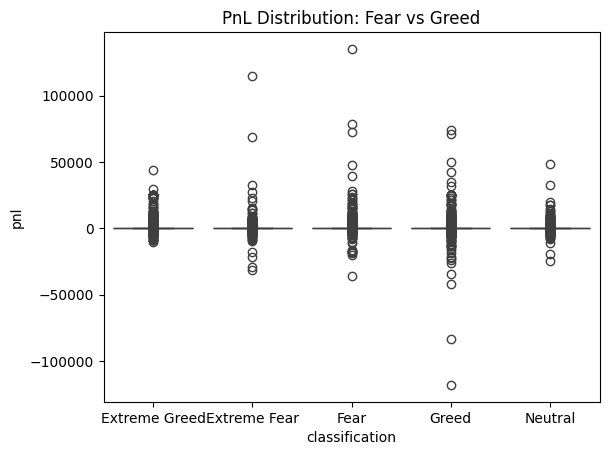

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='classification', y='pnl', data=data)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

In [130]:
# win rate comparison
win_rate_sentiment = data.groupby('classification')['win'].mean()
print(win_rate_sentiment)

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


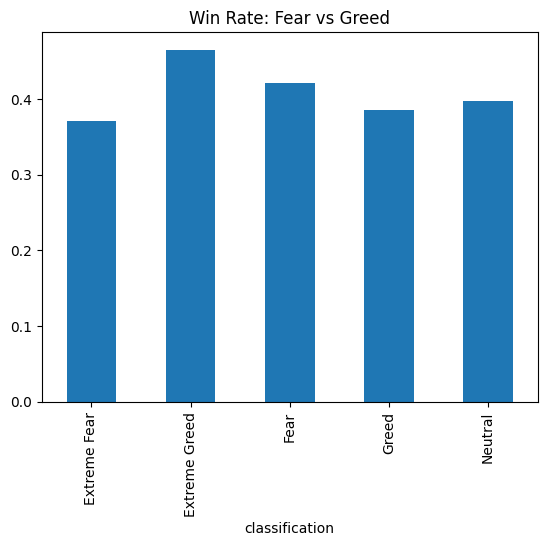

In [131]:
win_rate_sentiment.plot(kind='bar', title='Win Rate: Fear vs Greed')
plt.show()

In [132]:
# trade frequency
freq = data.groupby('classification').size()
print(freq)

classification
Extreme Fear     21400
Extreme Greed    39992
Fear             61837
Greed            50303
Neutral          37686
dtype: int64


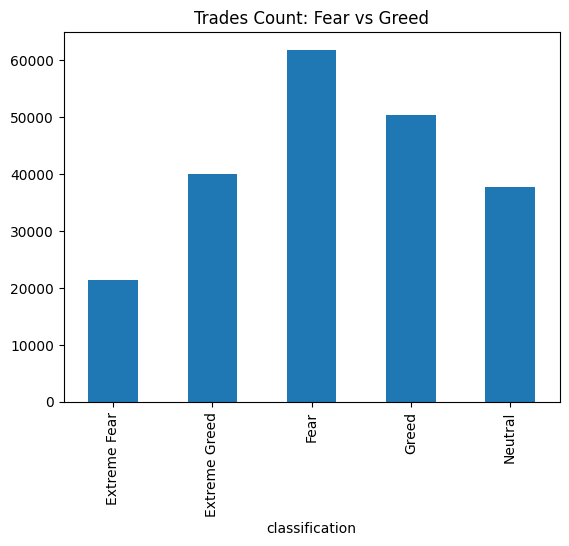

In [133]:
freq.plot(kind='bar', title='Trades Count: Fear vs Greed')
plt.show()

In [134]:
# position bias buy and sell
bias = pd.crosstab(data['classification'], data['side'], normalize='index')
print(bias)

side                 BUY      SELL
classification                    
Extreme Fear    0.510981  0.489019
Extreme Greed   0.448590  0.551410
Fear            0.489513  0.510487
Greed           0.488559  0.511441
Neutral         0.503343  0.496657


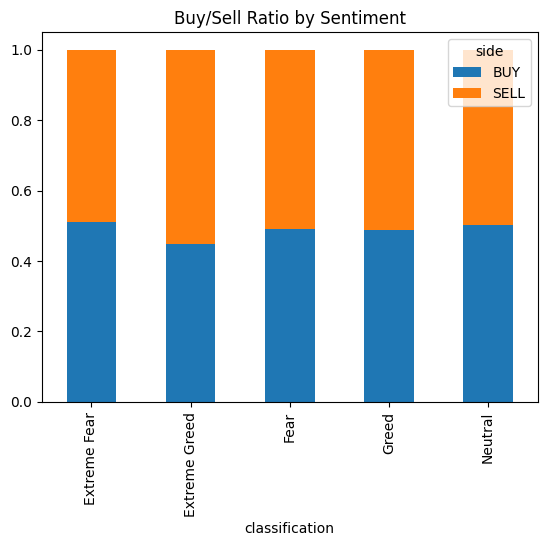

In [135]:
bias.plot(kind='bar', stacked=True, title='Buy/Sell Ratio by Sentiment')
plt.show()

In [136]:
#high vs low trade size
median_size = data['size_usd'].median()

data['size_group'] = data['size_usd'].apply(lambda x: 'High' if x > median_size else 'Low')

In [137]:
# frequent vs infrequent traders
trade_counts = data['account'].value_counts()

data['trader_type'] = data['account'].apply(lambda x: 'Frequent' if trade_counts[x] > 50 else 'Infrequent')

In [138]:
# consitent vs risky trader
pnl_std = data.groupby('account')['pnl'].std()

data['consistency'] = data['account'].apply(
    lambda x: 'Consistent' if pnl_std[x] < pnl_std.mean() else 'Risky'
)

In [139]:
print(data.groupby('size_group')['pnl'].mean())
print(data.groupby('trader_type')['pnl'].mean())
print(data.groupby('consistency')['pnl'].mean())

size_group
High    92.719310
Low      4.380971
Name: pnl, dtype: float64
trader_type
Frequent    48.549304
Name: pnl, dtype: float64
consistency
Consistent     24.179185
Risky         169.046006
Name: pnl, dtype: float64


Bonus

In [140]:
# prediting next day
data = data.sort_values(['account','date'])
data['next_pnl'] = data.groupby('account')['pnl'].shift(-1)
data['profit_next_day'] = data['next_pnl'] > 0

In [141]:
print(data[['pnl','next_pnl','profit_next_day']].head())

       pnl  next_pnl  profit_next_day
14223  0.0       0.0            False
14224  0.0       0.0            False
14225  0.0       0.0            False
14226  0.0       0.0            False
14227  0.0       0.0            False


In [142]:
# convert side to numeric
data['side_num'] = data['side'].map({'BUY':1, 'SELL':0})

# select features
features = ['value','size_usd','win','side_num']

In [143]:
model_data = data[features + ['profit_next_day']].dropna()

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = model_data[features]
y = model_data['profit_next_day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9153015812896506


CLUSTERING TRADERS

In [145]:
trader_features = data.groupby('account')[['pnl','win','size_usd','trade_id']].agg({
    'pnl': 'mean',
    'win': 'mean',
    'size_usd': 'mean',
    'trade_id': 'count'
}).reset_index()

trader_features.rename(columns={'trade_id': 'trade_count'}, inplace=True)

print(trader_features.head())

                                      account         pnl       win  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  419.127768  0.359612   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    6.577654  0.442720   
2  0x271b280974205ca63b716753467d5a371de622ab  -18.492043  0.301917   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4    9.951530  0.438585   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd   52.071011  0.519914   

       size_usd  trade_count  
0  16159.576734         3818  
1   1653.226327         7280  
2   8893.000898         3809  
3    507.626933        13311  
4   3138.894782         3239  


In [146]:
# scaling
from sklearn.preprocessing import StandardScaler

features = ['pnl','win','size_usd','trade_count']

scaler = StandardScaler()
X = scaler.fit_transform(trader_features[features])

In [147]:
trader_features = trader_features.dropna()

In [148]:
# k means clustering
from sklearn.preprocessing import StandardScaler

features = ['pnl','win','size_usd','trade_count']

scaler = StandardScaler()
X = scaler.fit_transform(trader_features[features])

In [149]:


print(data.dtypes)

account                     object
coin                        object
execution_price            float64
size_tokens                float64
size_usd                   float64
side                        object
timestamp_ist       datetime64[ns]
start_position             float64
direction                   object
pnl                        float64
transaction_hash            object
order_id                     int64
crossed                       bool
fee                        float64
trade_id                   float64
timestamp_x         datetime64[ns]
date                datetime64[ns]
timestamp_y                  int64
value                        int64
classification              object
win                           bool
size_group                  object
trader_type                 object
consistency                 object
next_pnl                   float64
profit_next_day               bool
side_num                     int64
dtype: object


In [150]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(X)

print(trader_features.head())

                                      account         pnl       win  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  419.127768  0.359612   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    6.577654  0.442720   
2  0x271b280974205ca63b716753467d5a371de622ab  -18.492043  0.301917   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4    9.951530  0.438585   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd   52.071011  0.519914   

       size_usd  trade_count  cluster  
0  16159.576734         3818        0  
1   1653.226327         7280        2  
2   8893.000898         3809        2  
3    507.626933        13311        1  
4   3138.894782         3239        2  


In [151]:

# analyzing clusers
cluster_summary = trader_features.groupby('cluster')[features].mean()
print(cluster_summary)

                pnl       win      size_usd   trade_count
cluster                                                  
0        203.649635  0.439536  10353.397560   4009.000000
1         38.390661  0.379881   1915.636756  20003.833333
2         30.227394  0.381526   4033.276520   3077.642857


In [152]:
def label_cluster(row):
    if row['cluster'] == 0:
        return "High Frequency Traders"
    elif row['cluster'] == 1:
        return "Low Risk Traders"
    else:
        return "High Risk Traders"

trader_features['cluster_label'] = trader_features.apply(label_cluster, axis=1)


In [153]:
cluster_map = {
    0: "Consistent Winners",
    1: "Risky Traders",
    2: "Losing Traders"
}

trader_features['cluster_name'] = trader_features['cluster'].map(cluster_map)

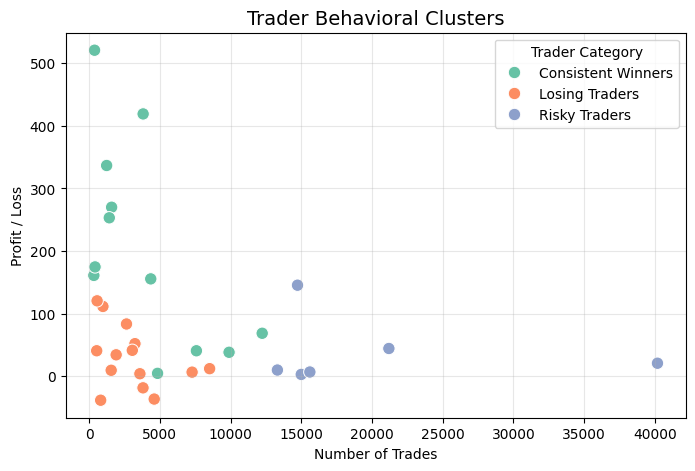

In [154]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    data=trader_features,
    x='trade_count',
    y='pnl',
    hue='cluster_name',
    palette='Set2',
    s=80
)

plt.title("Trader Behavioral Clusters", fontsize=14)
plt.xlabel("Number of Trades")
plt.ylabel("Profit / Loss")
plt.legend(title="Trader Category")
plt.grid(alpha=0.3)

plt.show()

In [155]:
print(data.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp_x', 'date', 'timestamp_y', 'value', 'classification', 'win',
       'size_group', 'trader_type', 'consistency', 'next_pnl',
       'profit_next_day', 'side_num'],
      dtype='object')


In [159]:
data = data.merge(trader_features[['account','cluster_name']], on='account', how='left')
print(data.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp_x', 'date', 'timestamp_y', 'value', 'classification', 'win',
       'size_group', 'trader_type', 'consistency', 'next_pnl',
       'profit_next_day', 'side_num', 'cluster_name_x', 'cluster_name_y',
       'cluster_name'],
      dtype='object')


for sample dataset

In [184]:
# Trade count per day per trader
data['win'] = data['pnl'].apply(lambda x: 1 if x > 0 else 0)
trade_count = data.groupby(['account','date']).size().reset_index(name='trade_count')

df = data.merge(trade_count, on=['account','date'], how='left')

In [185]:
from sklearn.cluster import KMeans

trader_features = df.groupby('account').agg({
    'pnl':'sum',
    'win':'mean',
    'trade_count':'mean'
}).reset_index()

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(trader_features[['pnl','win','trade_count']])

In [186]:
cluster_map = {
    0: 'Low Risk',
    1: 'High Frequency',
    2: 'High Profit'
}

trader_features['cluster_name'] = trader_features['cluster'].map(cluster_map)

In [187]:
if 'cluster_name' in df.columns:
    df = df.drop(columns=['cluster_name'])

In [188]:
df = df.merge(trader_features[['account','cluster_name']], on='account', how='left')

In [189]:
final_df = df[['account','date','pnl','win','trade_count','classification','cluster_name']]
print(final_df.head())

                                      account       date  pnl  win  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11  0.0    0   
1  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11  0.0    0   
2  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11  0.0    0   
3  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11  0.0    0   
4  0x083384f897ee0f19899168e3b1bec365f52a9012 2024-11-11  0.0    0   

   trade_count classification cluster_name  
0          177  Extreme Greed  High Profit  
1          177  Extreme Greed  High Profit  
2          177  Extreme Greed  High Profit  
3          177  Extreme Greed  High Profit  
4          177  Extreme Greed  High Profit  


In [190]:
final_df.to_csv("final_data.csv", index=False)
print(final_df.shape)

(211218, 7)
